# Untangle Spatial Relationships

Unsupervised algorithms are able to cluster data automatically and are not in need of a target label to do this. This is perfect for feature discovery in feature engineering.

Unsupervised ML algorithms are of two main categories

- clustering
- association

## Clustering 

This simply means grouping of related data point together basing on how similar they are to each other.simply means the assigning of data points to groups based upon how similar the points are to each other

A clustering algorithm makes "birds of a feather flock together," so to 
[source](https://www.kaggle.com/ryanholbrook/clustering-with-k-means)

Clustering algorithms help ML models to untangle complex relationships that are based on the proximity and make sense of data. When used for feature discovery and engineering, it helps use to discover patterns in our data set that can otherwise be hidden and complex to understand.

## Clustering Labels Of A Feature

Clustering does feature [dicretization](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html) transform when applied to a single feature, it acts like 'binning'. When applied to multiple feature it acts like a `multi-dimensional binning` this is also referred to as `vector quantization`, in a a K-Means algorithm, this is done with the help of an artificial neural network called [Learning Vector Quantization algorithm (LVQ)](https://machinelearningmastery.com/learning-vector-quantization-for-machine-learning/).

The main idea behind clustering is that we break down complicated relationships down in to smaller chunks that a model can understand instead of the model trying to understand all the complicated associations between data points aka `divide and conquer`

We can create another feature in the dataframe that will store the cluster to which each record belongs to hence giving the model more information on the data points and how they are related to each other.

## K-Means 

K-Means is one of the most popular unsupervised learning algorithms out there. It clusters data basing on the Euclidean distance between data points, it does this by placing random numbers on points within a feature-space. Each data point in the dataset is assigned to the cluster of the number point to which its closest to. This randomly placed number points in the feature-space are called **centroids**. Hence data points are clustered basing on which centroid its closest to. The "K" in "K-Means" is the total number of centroids placed in the feature-space, the "K" is a parameter that we can twick on our own.

### What does K-Means try to learn from data?

Think of each centroid as a point from which a circle is drawn(centroid is center of the circle) any data point that is within the circumference of the circle will be classified as a cluster of that specific centroid in which it originates. When a circles from competing centroids overlap, they form a line. This is called [Voronoi tessallation](https://www.whitman.edu/Documents/Academics/Mathematics/burns.pdf). These tessallations tell us to which cluster data points will be assinged to. This tessallations is what K-Means tries to learn from data.

**NOTE**

The most important parameter you need to tune is the `n_clusters` the "K"

[dataset source](https://www.kaggle.com/camnugent/california-housing-prices)

![Voronoi tessallation](Voronoitessallation.gif)

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [60]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [61]:
df = pd.read_csv('datasets/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [62]:
X = df.loc[:, ["median_income", "latitude", "longitude"]]
X.head()

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [63]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(X)

KMeans(n_clusters=6)

In [64]:
X['cluster'] = kmeans.predict(X)
X['cluster'] = X['cluster'].astype("category")

In [65]:
X.head()

,median_income,latitude,longitude,cluster
0,8.3252,37.88,-122.23,4
1,8.3014,37.86,-122.22,4
2,7.2574,37.85,-122.24,4
3,5.6431,37.85,-122.25,4
4,3.8462,37.85,-122.25,3


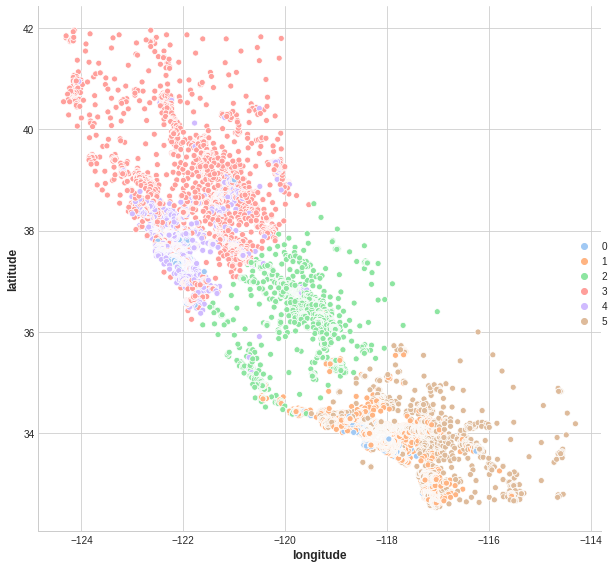

In [66]:
sns.relplot(x = 'longitude', y = 'latitude', hue = 
            X['cluster'].tolist(), data = X, palette='pastel',height = 8)

In [67]:
X = df.loc[:, ["total_rooms", "total_bedrooms", "population"]]
X.dropna(inplace = True)

In [68]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)
X['cluster'] = X['cluster'].astype('category')

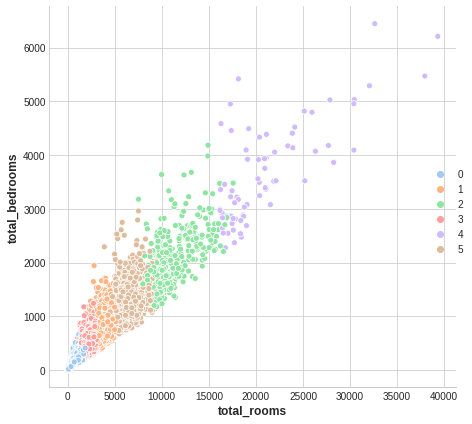

In [74]:
sns.relplot(x = 'total_rooms', y = 'total_bedrooms', 
           hue = X['cluster'].tolist(), data = X, palette='pastel', height = 6)